In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 256, 256
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


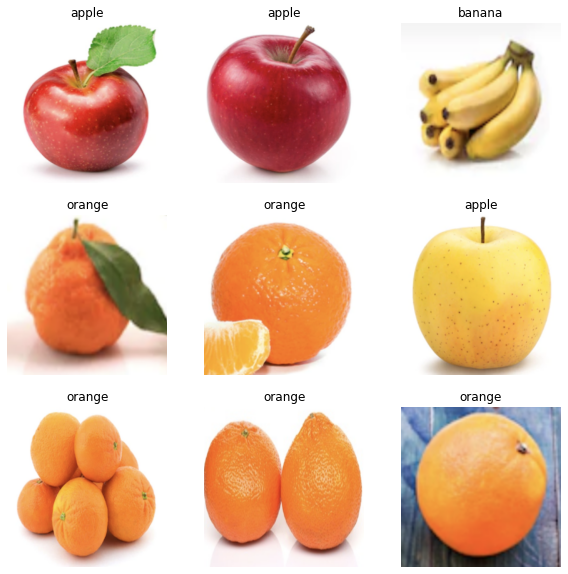

In [3]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [5]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [6]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 1s 27ms/step - loss: 1.0242 - accuracy: 0.5022 - val_loss: 0.8545 - val_accuracy: 0.7121
Epoch 2/10
23/23 [==============================] - 0s 14ms/step - loss: 0.7294 - accuracy: 0.6891 - val_loss: 0.5867 - val_accuracy: 0.6970
Epoch 3/10
23/23 [==============================] - 0s 15ms/step - loss: 0.4838 - accuracy: 0.7913 - val_loss: 0.7303 - val_accuracy: 0.6515
Epoch 4/10
23/23 [==============================] - 0s 15ms/step - loss: 0.3924 - accuracy: 0.8413 - val_loss: 0.4173 - val_accuracy: 0.8788
Epoch 5/10
23/23 [==============================] - 0s 17ms/step - loss: 0.2632 - accuracy: 0.9087 - val_loss: 0.3558 - val_accuracy: 0.8788
Epoch 6/10
23/23 [==============================] - 0s 15ms/step - loss: 0.2117 - accuracy: 0.9174 - val_loss: 0.6466 - val_accuracy: 0.8030
Epoch 7/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1750 - accuracy: 0.9348 - val_loss: 0.3893 - val_accuracy: 0.8485
Epoch 8/10
23

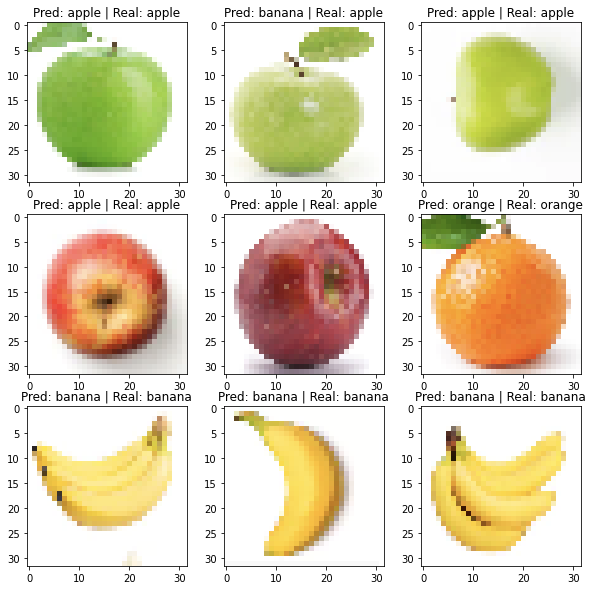

In [8]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite','wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MDPARV~1\AppData\Local\Temp\tmpld1lc9tk\assets


INFO:tensorflow:Assets written to: C:\Users\MDPARV~1\AppData\Local\Temp\tmpld1lc9tk\assets
